In [34]:
import zipfile

with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
import numpy as np
import pandas as pd

In [36]:
df = pd.read_csv('CarPrice_Assignment.csv')
print(df.head())
print(df.describe())
print(df.dtypes)
print(df.isnull().sum())
print(df.shape)

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [37]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Remove duplicate rows if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")


Number of duplicate rows: 0


In [38]:
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# outlier detection
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers = np.where(z_scores > threshold)
print(f"Number of outliers detected: {len(outliers[0])}")

Number of outliers detected: 30


In [ ]:
# Outlier indices per column
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_dict = {}
for i, col in enumerate(numeric_cols):
    outlier_dict[col] = np.where(z_scores[:, i] > threshold)[0]
for col, idx in outlier_dict.items():
    print(f"{col}: {len(idx)} outliers at indices {idx}")

car_ID: 0 outliers at indices []
symboling: 0 outliers at indices []
wheelbase: 1 outliers at indices [73]
carlength: 0 outliers at indices []
carwidth: 0 outliers at indices []
carheight: 0 outliers at indices []
curbweight: 0 outliers at indices []
enginesize: 5 outliers at indices [47 48 49 73 74]
boreratio: 0 outliers at indices []
stroke: 3 outliers at indices [111 113 134]
compressionratio: 9 outliers at indices [ 63 158 159 174 182 184 187 192 203]
horsepower: 2 outliers at indices [ 49 129]
peakrpm: 2 outliers at indices [165 166]
citympg: 3 outliers at indices [18 30 90]
highwaympg: 2 outliers at indices [18 30]
price: 3 outliers at indices [16 73 74]


C:\Users\User\AppData\Local\Temp\ipykernel_4972\4020771119.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Outlier'])
C:\Users\User\AppData\Local\Temp\ipykernel_4972\4020771119.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Outlier'])
C:\Users\User\AppData\Local\Temp\ipykernel_4972\4020771119.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Outlier'])
C:\Users\User\AppData\Local\Temp\ipykernel_4972\4020771119.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Outlier'])
C:\Users\User\AppData\Local\Temp\ipykernel_4972\

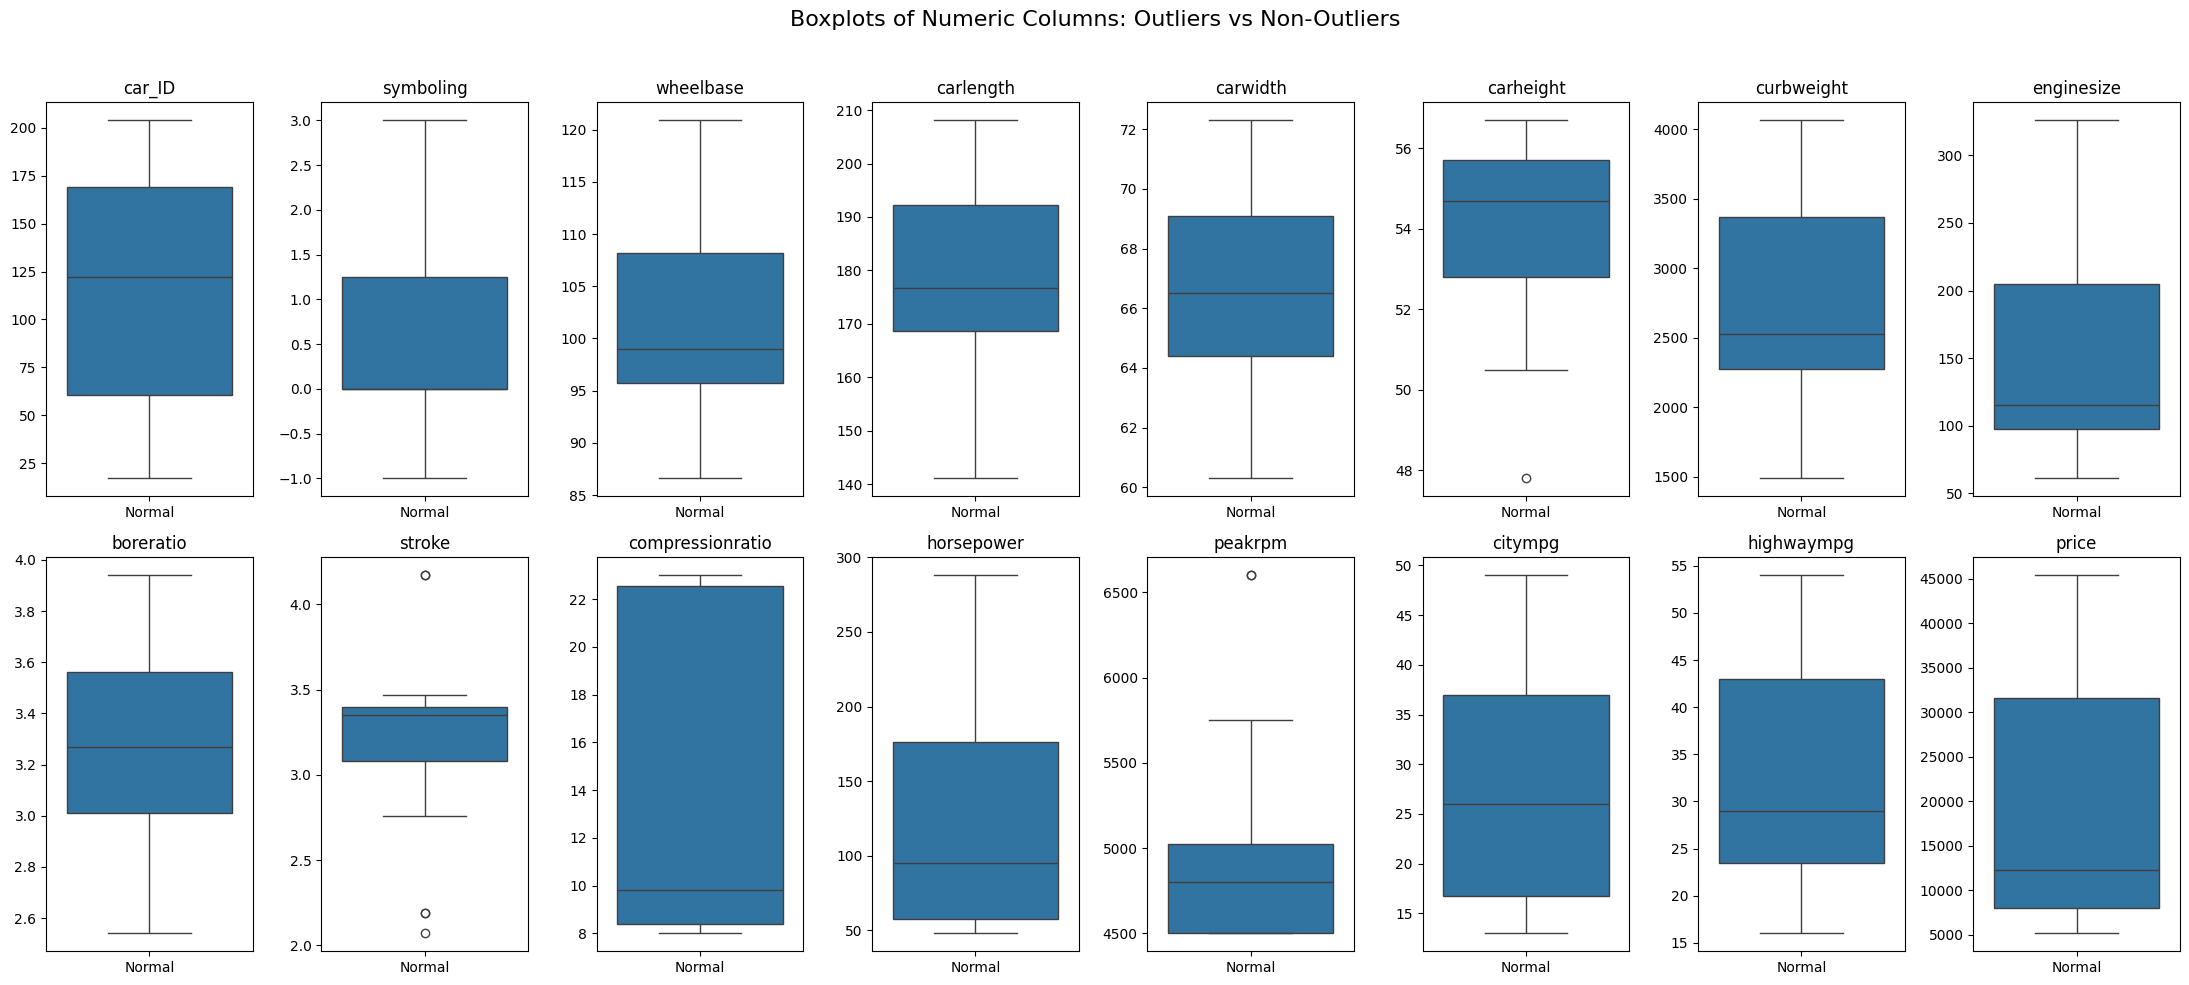

In [41]:
# outliers vs non-outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=int(len(numeric_cols)/2), figsize=(22, 10))
fig.suptitle("Boxplots of Numeric Columns: Outliers vs Non-Outliers", fontsize=16)
for idx, col in enumerate(numeric_cols):
    ax = axes[idx // int(len(numeric_cols)/2), idx % int(len(numeric_cols)/2)]
    sns.boxplot(data=[normal_data[col], outlier_data[col]], ax=ax)
    ax.set_xticklabels(['Normal', 'Outlier'])
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# check for similar car_ID values with close spelling + print them against each other
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
car_ids = df['car_ID'].astype(str).unique()
similar_pairs = []
for i in range(len(car_ids)):
    for j in range(i + 1, len(car_ids)):
        if similar(car_ids[i], car_ids[j]) > 0.8:  # threshold for similarity
            similar_pairs.append((car_ids[i], car_ids[j]))
if similar_pairs:
    print("Similar car_ID values found:")
    for pair in similar_pairs:
        print(f"{pair[0]} <-> {pair[1]}")
# check for similar car_ID values with close spelling + print them against each other
else:
    print("No similar car_ID values found.")

No similar car_ID values found.


In [44]:
# print the unique car_ID names
unique_car_names = df['CarName'].unique()
print("Unique car names:")
for car_name in unique_car_names:
    print(car_name)
# print the unique car_ID names
unique_car_names = df['CarName'].unique()

Unique car names:
alfa-romero giulia
alfa-romero stelvio
alfa-romero Quadrifoglio
audi 100 ls
audi 100ls
audi fox
audi 5000
audi 4000
audi 5000s (diesel)
bmw 320i
bmw x1
bmw x3
bmw z4
bmw x4
bmw x5
chevrolet impala
chevrolet monte carlo
chevrolet vega 2300
dodge rampage
dodge challenger se
dodge d200
dodge monaco (sw)
dodge colt hardtop
dodge colt (sw)
dodge coronet custom
dodge dart custom
dodge coronet custom (sw)
honda civic
honda civic cvcc
honda accord cvcc
honda accord lx
honda civic 1500 gl
honda accord
honda civic 1300
honda prelude
honda civic (auto)
isuzu MU-X
isuzu D-Max 
isuzu D-Max V-Cross
jaguar xj
jaguar xf
jaguar xk
maxda rx3
maxda glc deluxe
mazda rx2 coupe
mazda rx-4
mazda glc deluxe
mazda 626
mazda glc
mazda rx-7 gs
mazda glc 4
mazda glc custom l
mazda glc custom
buick electra 225 custom
buick century luxus (sw)
buick century
buick skyhawk
buick opel isuzu deluxe
buick skylark
buick century special
buick regal sport coupe (turbo)
mercury cougar
mitsubishi mirage
mits

In [ ]:
df[['brand', 'model']] = df['CarName'].str.split(' ', n=1, expand=True)
df = df.drop(columns=['car_ID'])
print("Unique brands:", df['brand'].unique())
print("Unique models:", df['model'].unique())

Unique brands: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Unique models: ['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'MU-X' 'D-Max ' 'D-Max V-Cross'
 'xj' 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' 'glc'
 'rx-7 gs' 'glc 4' 'glc custom l' 'glc custom' 'electra 225 custom'
 'century luxus (sw)' 'century' 'skyhawk' 'opel isuzu deluxe' 'skylark'
 'century special' 'regal sport coupe (turbo)' 'cougar' 'mirage' 'l

In [ ]:
print("New columns added:")
print(df[['brand', 'model']].head())

New columns added:
         brand         model
0  alfa-romero        giulia
1  alfa-romero       stelvio
2  alfa-romero  Quadrifoglio
3         audi        100 ls
4         audi         100ls


In [47]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [ ]:
df.drop(columns=['CarName'], inplace=True)  

In [49]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [ ]:
# similar car brand names with 1-3 characters difference
from difflib import get_close_matches
def find_similar_brands(brand, brand_list, n=3, cutoff=0.8):
    return get_close_matches(brand, brand_list, n=n, cutoff=cutoff)
# Example usage
brand_list = df['brand'].unique()
similar_brands = {}
for brand in brand_list:
    similar_brands[brand] = find_similar_brands(brand, brand_list)
# print similar brands
print("Similar brands found:")
for brand, matches in similar_brands.items():
    if matches:
        print(f"{brand}: {matches}")
    else:
        print(f"{brand}: No similar brands found")
        

Similar brands found:
alfa-romero: ['alfa-romero']
audi: ['audi']
bmw: ['bmw']
chevrolet: ['chevrolet']
dodge: ['dodge']
honda: ['honda']
isuzu: ['isuzu']
jaguar: ['jaguar']
maxda: ['maxda', 'mazda']
mazda: ['mazda', 'maxda']
buick: ['buick']
mercury: ['mercury']
mitsubishi: ['mitsubishi']
Nissan: ['Nissan', 'nissan']
nissan: ['nissan', 'Nissan']
peugeot: ['peugeot']
plymouth: ['plymouth']
porsche: ['porsche', 'porcshce']
porcshce: ['porcshce', 'porsche']
renault: ['renault']
saab: ['saab']
subaru: ['subaru']
toyota: ['toyota', 'toyouta']
toyouta: ['toyouta', 'toyota']
vokswagen: ['vokswagen', 'volkswagen']
volkswagen: ['volkswagen', 'vokswagen']
vw: ['vw']
volvo: ['volvo']


In [ ]:
df_copy = df.copy()

In [52]:
df_copy.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [66]:
brand_counts = df_copy['brand'].value_counts()
print("Number of cars for each unique brand:")
print(brand_counts)


Number of cars for each unique brand:
brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
Name: count, dtype: int64


In [68]:
for brand, matches in similar_brands.items():
    if len(matches) > 1:
        counts = [brand_counts.get(m, 0) for m in matches]
        match_str = ', '.join([f"{m} ({c})" for m, c in zip(matches, counts)])
        print(f"Group for '{brand}': {match_str} (count: {len(matches)})")
num_similar_brand_groups = sum(1 for matches in similar_brands.values() if len(matches) > 1)
print(f"Number of similar car brand groups (with 1-3 characters difference): {num_similar_brand_groups}")

Group for 'maxda': maxda (2), mazda (15) (count: 2)
Group for 'mazda': mazda (15), maxda (2) (count: 2)
Group for 'Nissan': Nissan (1), nissan (17) (count: 2)
Group for 'nissan': nissan (17), Nissan (1) (count: 2)
Group for 'porsche': porsche (4), porcshce (1) (count: 2)
Group for 'porcshce': porcshce (1), porsche (4) (count: 2)
Group for 'toyota': toyota (31), toyouta (1) (count: 2)
Group for 'toyouta': toyouta (1), toyota (31) (count: 2)
Group for 'vokswagen': vokswagen (1), volkswagen (9) (count: 2)
Group for 'volkswagen': volkswagen (9), vokswagen (1) (count: 2)
Number of similar car brand groups (with 1-3 characters difference): 10


In [ ]:
# Find the representative brand for each group (the one with the highest count)
brand_counts = df_copy['brand'].value_counts()
brand_map = {}

for group in similar_brands.values():
    if len(group) > 1:
        # Find the brand with the highest count in this group
        counts = [brand_counts.get(b, 0) for b in group]
        representative = group[np.argmax(counts)]
        for b in group:
            brand_map[b] = representative
    else:
        brand_map[group[0]] = group[0]

# Replace brands in df_copy with their representative brand
df_copy['brand'] = df_copy['brand'].map(brand_map)

print("Unique brands after replacement:")
print(df_copy['brand'].unique())

Unique brands after replacement:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'vw' 'volvo']


In [ ]:
df_copy['brand'] = df_copy['brand'].replace({'vw': 'volkswagen'})

In [72]:
#check if the brand names are now consistent
unique_brands = df_copy['brand'].unique()
print("Unique brands after replacement:")
for brand in unique_brands:
    print(brand)

Unique brands after replacement:
alfa-romero
audi
bmw
chevrolet
dodge
honda
isuzu
jaguar
mazda
buick
mercury
mitsubishi
nissan
peugeot
plymouth
porsche
renault
saab
subaru
toyota
volkswagen
volvo


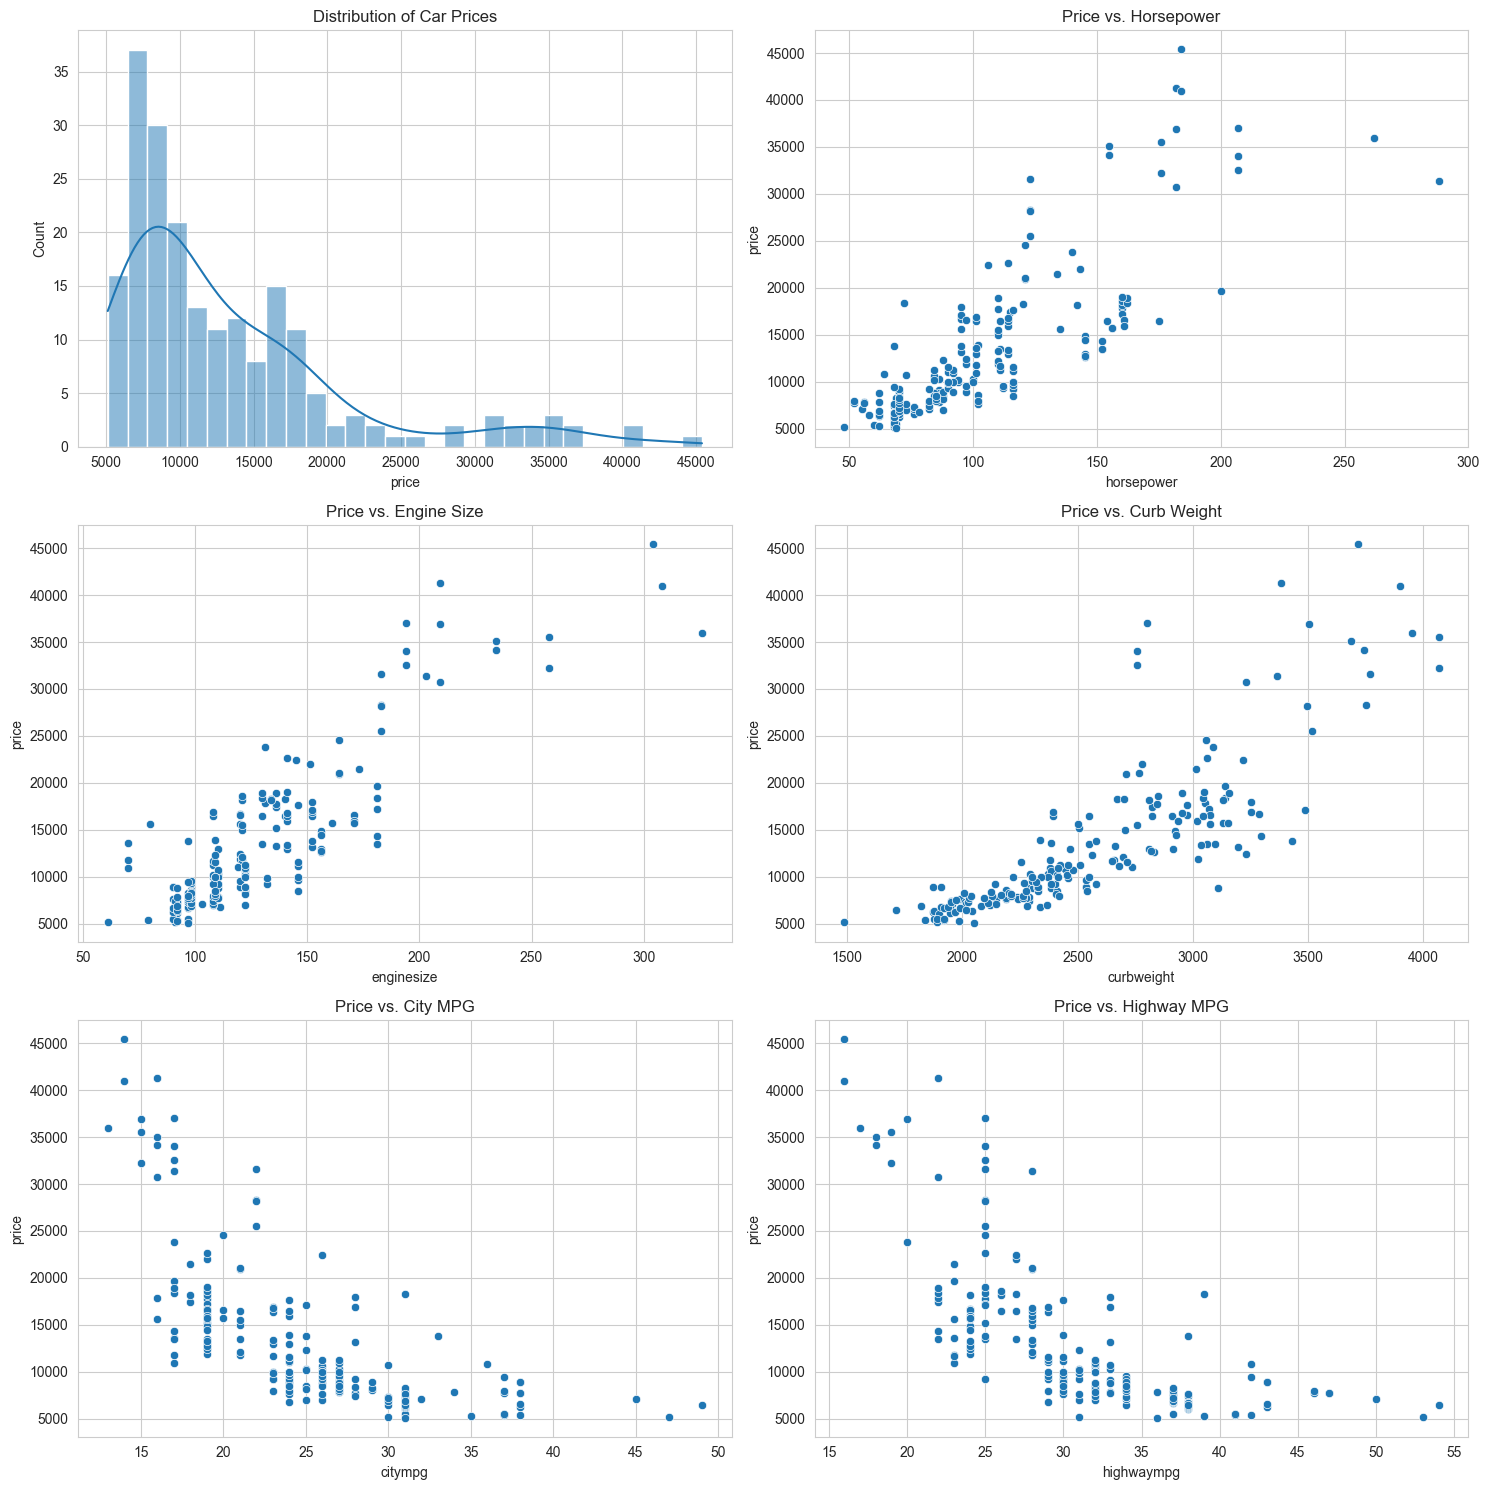

In [73]:
# EDA 
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
# Plot 1: Distribution of car prices
sns.histplot(df_copy['price'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Car Prices')
# Plot 2: Price vs. Horsepower
sns.scatterplot(data=df_copy, x='horsepower', y='price', ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Horsepower')
# Plot 3: Price vs. Engine Size
sns.scatterplot(data=df_copy, x='enginesize', y='price', ax=axes[1, 0])
axes[1, 0].set_title('Price vs. Engine Size')
# Plot 4: Price vs. Curb Weight
sns.scatterplot(data=df_copy, x='curbweight', y='price', ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Curb Weight')
# Plot 5: Price vs. City MPG
sns.scatterplot(data=df_copy, x='citympg', y='price', ax=axes[2, 0])
axes[2, 0].set_title('Price vs. City MPG')
# Plot 6: Price vs. Highway MPG
sns.scatterplot(data=df_copy, x='highwaympg', y='price', ax=axes[2, 1])
axes[2, 1].set_title('Price vs. Highway MPG')
# Adjust layout
plt.tight_layout()
plt.show()


In [77]:
# label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['brand', 'model', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

In [78]:
df_copy.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0,78
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0,122
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0,28
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1


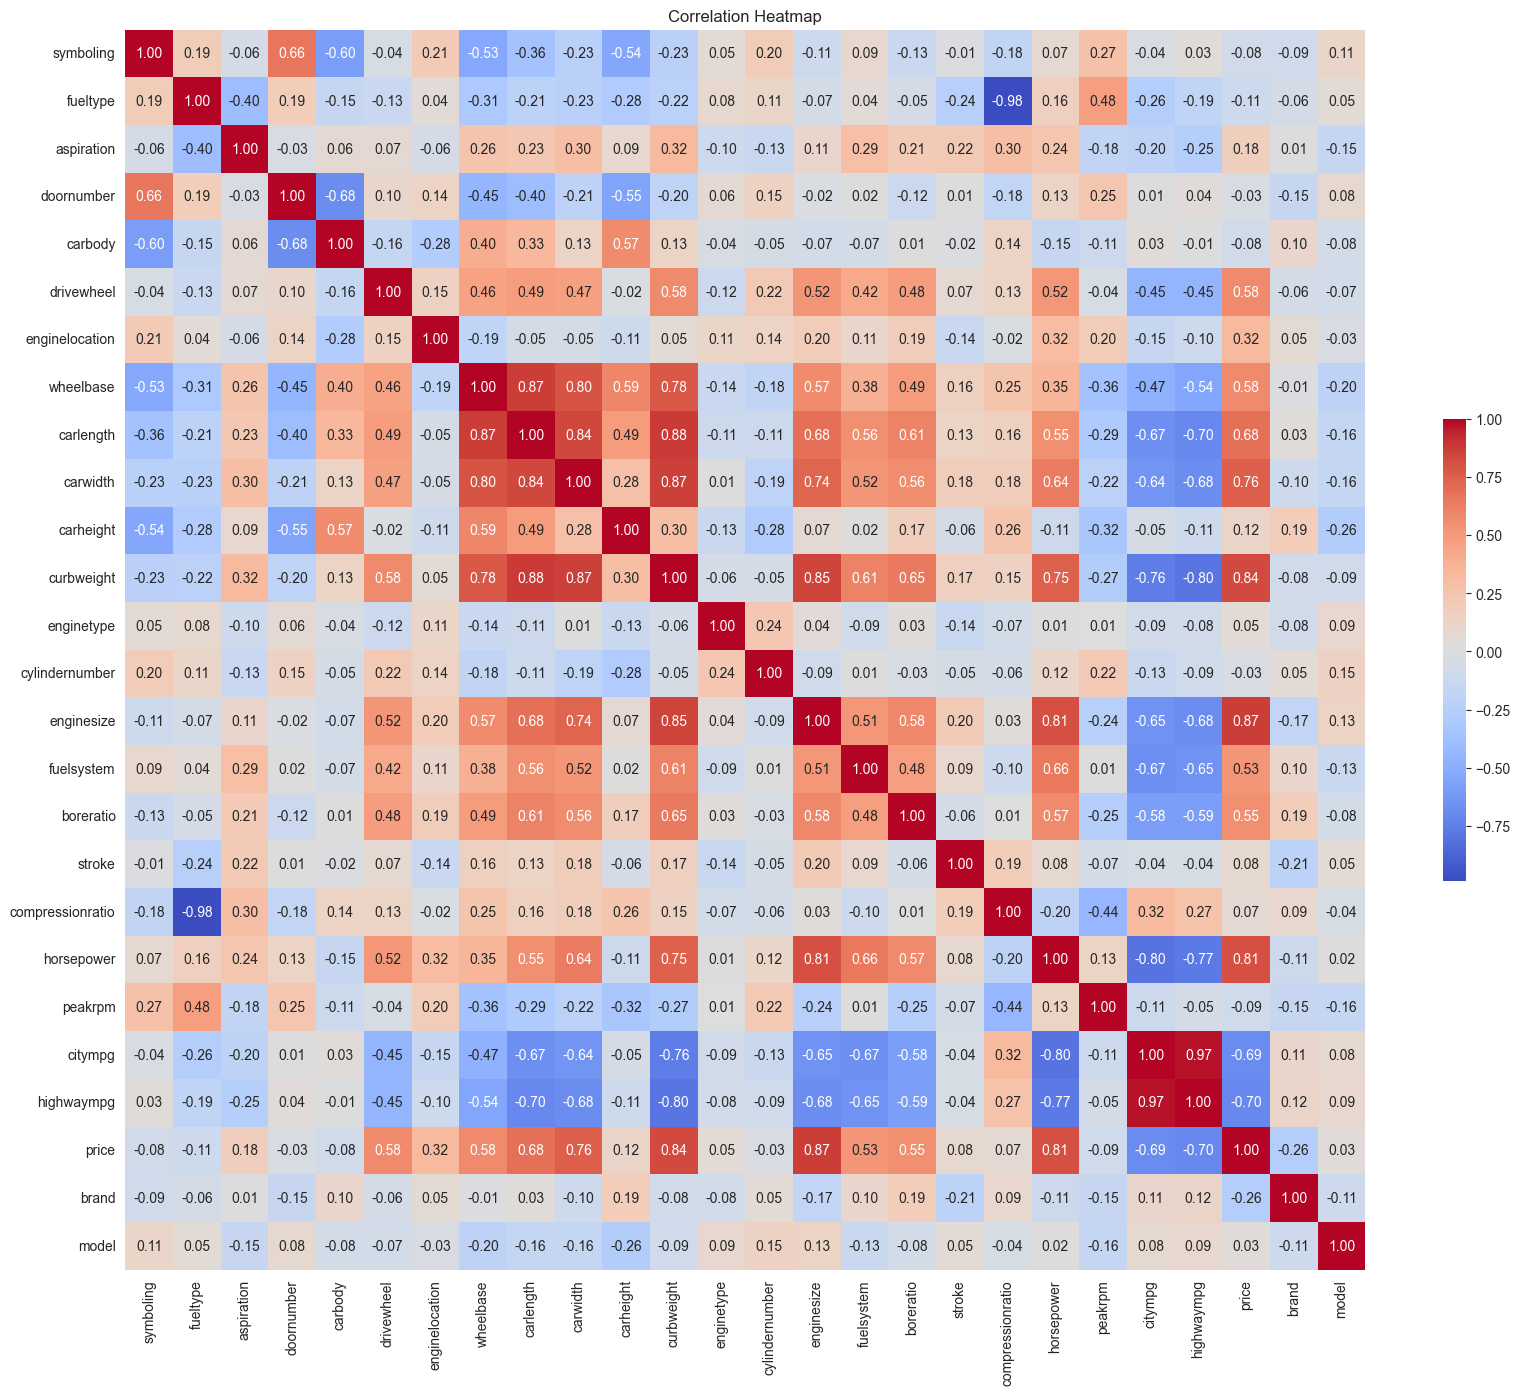

In [82]:
# heatmap of correlations
plt.figure(figsize=(20, 20))
sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .3})
plt.title('Correlation Heatmap')
plt.show()


In [83]:
# model training and evaluation
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns=['price'])
y = df_copy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}") # the value is in 
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 11913554.14758655
Root Mean Squared Error: 3451.6016785814886
Mean Absolute Error: 2165.5737825920423
R-squared: 0.8490885818224589


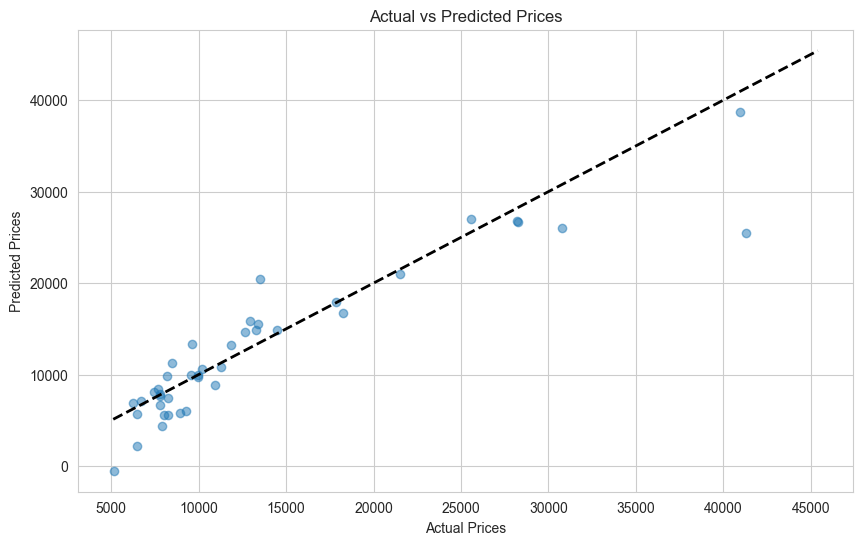

In [ ]:
# predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()